Problem Statement:

Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. The task is to classify these images into an apparel category amongst 10 categories on which the dataset is benchmarked.

Data Preparation and Visualization:

● Load the Fashion MNIST dataset.

● Visualize different samples from the dataset.

● Normalize the pixel values of the images to be between 0 and 1 for better model performance.

● Convert the output labels to categorical format for classification.

    Import libraries

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout,ReLU
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Class names for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(class_names)
print(f"Number of classes   : {num_classes}")
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #Load dataset

print(f"Shape of x_train    : {x_train.shape}")
print(f"Shape of y_train    : {y_train.shape}")
print(f"Shape of x_test     : {x_test.shape}")
print(f"Shape of y_test     : {y_test.shape}")
print(f"Shape of an image   : {x_train[6000].shape}")

Number of classes   : 10
Shape of x_train    : (60000, 28, 28)
Shape of y_train    : (60000,)
Shape of x_test     : (10000, 28, 28)
Shape of y_test     : (10000,)
Shape of an image   : (28, 28)


Visualize different samples from the dataset.

Input image


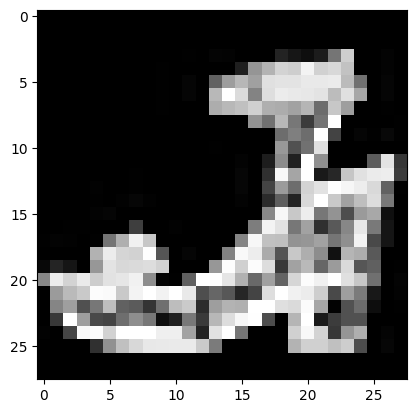

Sandal
Input image


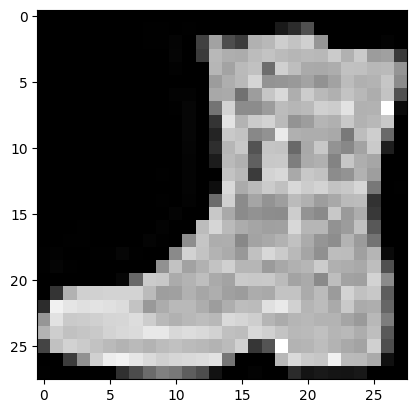

Ankle boot
Input image


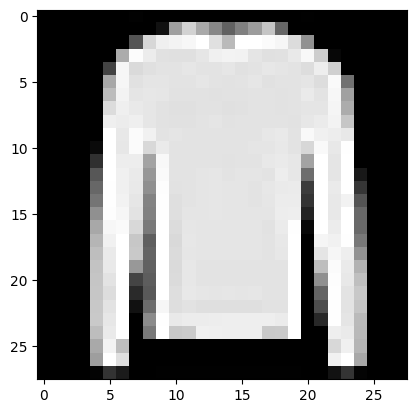

Pullover


In [3]:
print(f"Input image")
plt.imshow(x_train[60], cmap="gray") #select an image from the MNIST dataset
plt.show()
print(class_names[y_train[60]])

print(f"Input image")
plt.imshow(x_train[150], cmap="gray") #select an image from the MNIST dataset
plt.show()
print(class_names[y_train[150]])


print(f"Input image")
plt.imshow(x_train[15000], cmap="gray") #select an image from the MNIST dataset
plt.show()
print(class_names[y_train[15000]])

Normalization of image pixel values and conversion of the output labels to a one-hot encoded format.

In [4]:
# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Model Building and Training: Construct a Neural Network using TensorFlow and Keras.

● The model should consist of multiple dense layers with a significant number of neurons.

● Utilize ReLU activation for hidden layers and softmax activation for the output layer.

● Train the model on the prepared dataset.

● Implement callbacks, particularly TensorBoard, to visualize the training process.

In [5]:

# Define a deeper CNN model with padding and adjusted pooling layers
model = Sequential([
    Conv2D(32, (3, 3), activation=None, padding='same', input_shape=(28, 28, 1),kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation=None, padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation=None, padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(256, (3, 3), activation=None, padding='same',kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])

c:\Users\BHARAT\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    Learning Rate Scheduler

In [6]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_callback = LearningRateScheduler(scheduler)

Training:

Implement callbacks, particularly TensorBoard, to visualize the training process.

Track accuracy as a performance metric

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
datagen = ImageDataGenerator(rotation_range=20,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')
datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=512),epochs=100, validation_data=(x_test, y_test),callbacks=[tensorboard_callback,lr_callback])

#model.fit(x_train, y_train, batch_size=256,epochs=20, validation_data=(x_test, y_test),callbacks=[tensorboard_callback,lr_callback])
#model.fit(x_train, y_train, batch_size=1024,epochs=250, validation_data=(x_test, y_test))

#Track accuracy
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

Epoch 1/100


c:\Users\BHARAT\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 93s 755ms/step - accuracy: 0.5666 - loss: 1.6329 - val_accuracy: 0.1295 - val_loss: 3.2684 - learning_rate: 0.0010
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 85s 714ms/step - accuracy: 0.7786 - loss: 0.8126 - val_accuracy: 0.1823 - val_loss: 4.2503 - learning_rate: 0.0010
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 88s 738ms/step - accuracy: 0.8060 - loss: 0.6868 - val_accuracy: 0.3116 - val_loss: 2.7138 - learning_rate: 0.0010
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 89s 742ms/step - accuracy: 0.8264 - loss: 0.6087 - val_accuracy: 0.7049 - val_loss: 0.9676 - learning_rate: 0.0010
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 88s 741ms/step - accuracy: 0.8354 - loss: 0.5658 - val_accuracy: 0.7670 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 90s 753ms/step - accuracy: 0.8451 - loss: 0.5324 - val_accuracy: 0.8534 - val_loss: 0.4988 - learning_rate: 0.0010
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 87s 727ms/step - accuracy: 0.8496 -

Tensor Board

In [ ]:
#!pip install tensorboard
%load_ext tensorboard
%tensorboard --logdir logs/fit

Evaluation:

Evaluate the performance of the trained model using the testing dataset, ensuring that the model generalizes well to unseen data.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
model.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9138 - loss: 0.2863
Test accuracy: 0.9143


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 1,051,990 (4.01 MB)

 Trainable params: 525,514 (2.00 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 525,516 (2.00 MB)

In [ ]:
preds = model.predict(x_test)
preds_class = np.argmax(preds, axis=1)

print(f"Shape of preds: {preds.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of preds_class: {preds_class.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Shape of preds: (10000, 10)
Shape of y_test: (10000,)
Shape of preds_class: (10000,)


Analysis:

Analyze the results, understand the model's performance, and explore ways to improve it if necessary.

Peformance Evaluation:

Assess the model’s performance using both training and validation datasets.

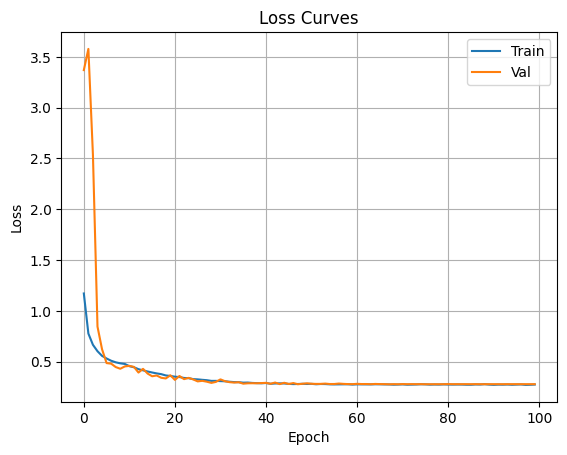

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

Visualize the training and validation loss and accuracy to identify any signs of overfitting or underfitting.

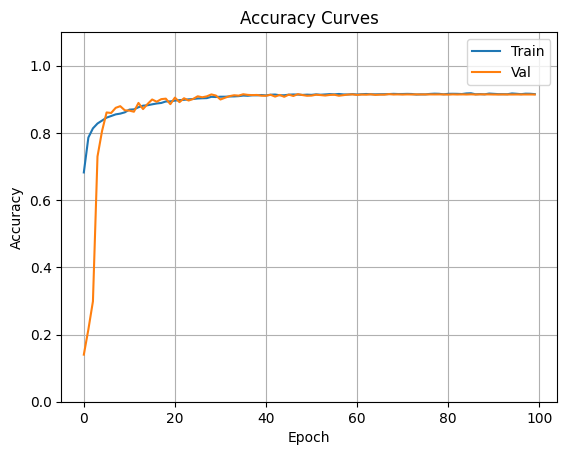

In [ ]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.title("Accuracy Curves")
plt.legend(["Train", "Val"])
plt.grid()
plt.show()

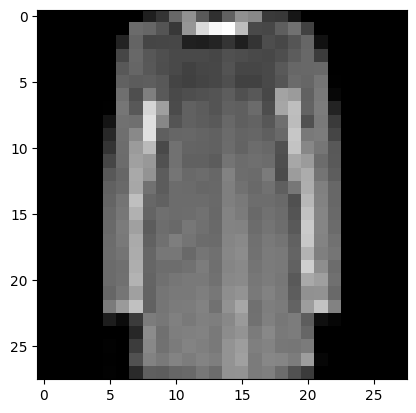

Coat


In [ ]:
plt.imshow(x_test[150].reshape(28,28), cmap="gray")
plt.show()
print(class_names[y_test[150]])

In [ ]:
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1000
           1       0.99      0.99      0.99      1000
           2       0.93      0.81      0.87      1000
           3       0.93      0.92      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.68      0.84      0.75      1000
           7       0.93      0.99      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.94      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.91      0.92     10000



In [ ]:
print(confusion_matrix(y_test, preds_class))

[[803   1  11  12   5   0 160   0   8   0]
 [  0 990   0   6   0   0   3   0   1   0]
 [  8   0 815   6  68   0 103   0   0   0]
 [ 12   6   4 916  13   0  48   0   1   0]
 [  0   0  18  34 876   0  71   0   1   0]
 [  0   0   0   0   0 978   0  18   0   4]
 [ 56   1  28  15  59   0 839   0   2   0]
 [  0   0   0   0   0   3   0 989   0   8]
 [  0   1   0   1   1   2   1   1 993   0]
 [  0   0   0   0   0   5   1  50   0 944]]
